l 7, epoch 10, batchsize 32, l-lookback period, n-no of predicting days, N-no of times

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

In [2]:
N=720 #24 hours x30 lookback period
l=30  #lookback
n=1   #number of days predicting

In [3]:
data=pd.read_csv('/content/drive/MyDrive/mtech/project/lstm_sst_2/moored_buoy_data/bd10/combined_3.csv')
df=data.iloc[:40000,:]
data_matrix=df.to_numpy()
data_sliced=data_matrix[:,3:]



#data_sliced=data_matrix[5000:5500,3:]

#slice of data; this data is from #19-5-2012 3am - 19/5/2018 3 am 



In [4]:
import tensorflow as tf
# from tf.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import concatenate
from keras.models import load_model
model=load_model('/content/drive/MyDrive/mtech/project/lstm_sst_2/code/functional_api/timeandsst/model/sst_anomaly_l4_comb_epoch5_batch_64_v9.hdf5')

In [5]:
data_slice_test=data_sliced[30000:31000,:]

sst_testing_complete = data_sliced[31000:31000+N+n+1,:1] #15/1/2019 3pm-31/5/2019 9pm
sst_testing_complete_test=data_sliced[31000:31000+N+n+1,:]
sst_total = np.concatenate((data_slice_test,sst_testing_complete_test), axis=0)

test_inputs = sst_total[len(sst_total) - len(sst_testing_complete) - l:] 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
test_inputs1 = scaler.fit_transform(test_inputs)




In [6]:
pred=[]
predictions1=0

test_inputs=np.copy(test_inputs1)
for i in range(l,l+N+n+1):

  trial=test_inputs1[i-l:i, 0:test_inputs1.shape[1]][None,:,:]
  #print(trial)
  '''predictions1=model.predict(trial)
  prediction=predictions1[6].reshape(-1,1)#need to change 7output model to single output
  pred.append(prediction)'''
  predictions1=model.predict(trial)
 #need to change 7output model to single output
  pred.append(predictions1)

  #if len(pred)>n:
    
   # test_inputs1[i-n,:]=test_inputs[i-n,:] #assigning real values back
  #test_inputs1[i]=predictions1
  #print(trial,prediction)

1/1 [==============================] - 0s 26ms/step


In [7]:
pred=np.array(pred).reshape(-1,1)


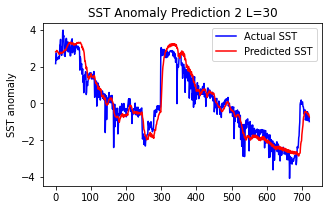

In [8]:
#import datetime
import matplotlib.pyplot as pylt
plt.figure(figsize=(5,3))
plt.plot(sst_testing_complete, color='blue', label='Actual SST')

plt.plot(pred , color='red', label='Predicted SST')
plt.title("SST Anomaly Prediction 2 L=%d"%(l))

#pylt.set_xlim([datetime.date(2018, 5, 1), datetime.date(2018, 5, 30)])
plt.ylabel('SST anomaly')
#pylt.ylim(0,35)
plt.legend()
plt.show()